In [ ]:
!pip install tensorflow==2.5 pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

In [ ]:
%tensorflow_version(2.5)

UsageError: Line magic function `%tensorflow_version(2.5)` not found.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [ ]:
# Before tensorflow 2.5 install
print(tf.__version__)
print(keras.__version__)
print(pd.__version__)
print(np.__version__)

2.5.0
2.5.0
1.4.4
1.19.5


In [ ]:
print(tf.__version__)
print(keras.__version__)
print(pd.__version__)
print(np.__version__)

2.5.0
2.5.0
1.4.4
1.19.5


In [ ]:
dataset = pd.read_csv('master_dataset2.csv')
dataset.shape

(71778, 43)

In [ ]:
X = dataset.drop('ID',axis=1)
y = dataset['ID']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Change the parameters for different training models.
def model5():
    model = keras.Sequential([layers.Dense(5, activation='relu'),
                              layers.Dense(10, activation='relu'),
                              layers.Dense(12)])
    return model

In [ ]:
model = model5()

In [ ]:
model.build()

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
print(keras.__version__)

2.5.0


In [ ]:
history = model.fit(X_train_scaled,y_train,batch_size=250, epochs=100,validation_data=(X_test_scaled,y_test),verbose=2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 86        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                60        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test_scaled,y_test)

449/449 [==============================] - 1s 2ms/step - loss: 0.0885 - sparse_categorical_accuracy: 0.9867


[0.0885421484708786, 0.9866954684257507]

In [ ]:
model.save("model21.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
open("model21.tflite","wb").write(tflite_model)

2204

In [ ]:
tflite_model_path = "model21.tflite"

In [ ]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Test the model on input data.
input_shape = input_details[0]['shape']
print(input_shape)

[ 1 42]


In [ ]:

# Load image
input_data = image

interpreter.set_tensor(input_details[0]['index'], input_data)

time_before=time()
interpreter.invoke()
time_after=time()
total_tflite_time = time_after - time_before
print("Total prediction time for tflite without opt model is: ", total_tflite_time)

output_data_tflite = interpreter.get_tensor(output_details[0]['index'])
print("The tflite w/o opt prediction for this image is: ", output_data_tflite, " 0=Uninfected, 1=Parasited")

In [ ]:
def model6():
    model = keras.Sequential([
        keras.layers.Dense(42, activation='tanh'),
        keras.layers.Dense(25, activation='tanh'),
        keras.layers.Dense(12)
    ])
    return model

In [ ]:
model2 = model6()

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history2 = model2.fit(X_train_scaled,y_train,batch_size=250, epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
183/183 [==============================] - 2s 4ms/step - loss: 1.1016 - sparse_categorical_accuracy: 0.7811 - val_loss: 0.3597 - val_sparse_categorical_accuracy: 0.9742
Epoch 2/100
183/183 [==============================] - 1s 4ms/step - loss: 0.1984 - sparse_categorical_accuracy: 0.9893 - val_loss: 0.1101 - val_sparse_categorical_accuracy: 0.9942
Epoch 3/100
183/183 [==============================] - 1s 3ms/step - loss: 0.0770 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.0552 - val_sparse_categorical_accuracy: 0.9950
Epoch 4/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0340 - val_sparse_categorical_accuracy: 0.9963
Epoch 5/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0239 - val_sparse_categorical_accuracy: 0.9970
Epoch 6/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0196 - sparse_cate

<Axes: >

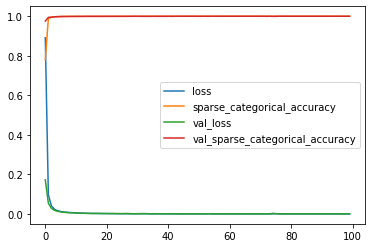

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
def model7():
    model = keras.Sequential([
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(12)
    ])
    return model

In [ ]:
model3 = model7()

In [ ]:
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history3 = model3.fit(X_train_scaled,y_train,batch_size=250, epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0052 - sparse_categorical_accuracy: 0.9989 - val_loss: 0.0070 - val_sparse_categorical_accuracy: 0.9986
Epoch 2/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0051 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.0059 - val_sparse_categorical_accuracy: 0.9986
Epoch 3/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0052 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.0065 - val_sparse_categorical_accuracy: 0.9984
Epoch 4/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0051 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.0064 - val_sparse_categorical_accuracy: 0.9984
Epoch 5/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0051 - sparse_categorical_accuracy: 0.9989 - val_loss: 0.0069 - val_sparse_categorical_accuracy: 0.9984
Epoch 6/100
183/183 [==============================] - 1s 4ms/step - loss: 0.0049 - sparse_cate

In [ ]:
model.summary()
model2.summary()
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                2752      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 12)                396       
                                                                 
Total params: 5,228
Trainable params: 5,228
Non-trainable params: 0
_________________________________________________________________


NameError: ignored

In [ ]:
model.save("model5.h5")
model2.save("model6.h5")
model3.save("model7.h5")


In [ ]:
#thostaf